In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#dosyaları listeleme
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

imagePaths = getListOfFiles("./AyiResimleri/bears/")

In [2]:
#resimleri okuma
veriler = []
lables = []
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    lables.append(lable)

    img = cv2.imread(image)
    #gürültü temizleme
    filtreliveri=cv2.fastNlMeansDenoising(img,None,10,10,10)
    
    filtreliveri = cv2.resize(filtreliveri, (32, 32), interpolation = cv2.INTER_AREA)
    veriler.append(filtreliveri)

veriler = np.array(veriler)
lables = np.array(lables)

lables = le.fit_transform(lables)

dataset_size = veriler.shape[0]
veriler = veriler.reshape(dataset_size,-1)

#PCA dönüşümü , boyut indirgeme
from sklearn.decomposition import PCA
pca=PCA(5)
datayeni=pca.fit_transform(veriler)

Ortalama Accuracy: 0.76158
Ortalama f1_Score: 0.76855
Ortalama recall: 0.76158
Ortalama precision: 0.83592
Ortalama roc_auc: 0.85595


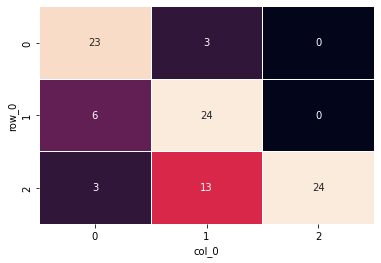

In [3]:
#KNN  => 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  KFold, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from numpy import mean

(trainX, testX, trainY, testY ) = train_test_split(datayeni, lables, test_size= 0.33, random_state=0)

model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, metric='minkowski')
model.fit(trainX, trainY)
y_pred= model.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

cv = KFold(n_splits=5, random_state = 0, shuffle=True)

accuracy = cross_val_score(model, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(model, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(model, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(model, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(model, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))

Ortalama Accuracy: 0.74000
Ortalama f1_Score: 0.74264
Ortalama recall: 0.74000
Ortalama precision: 0.77903
Ortalama roc_auc: 0.87143


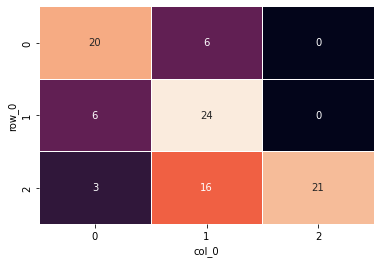

In [4]:
#KNN => 15
model = KNeighborsClassifier(n_neighbors=15, n_jobs=-1, metric='minkowski')
model.fit(trainX, trainY)
y_pred= model.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

accuracy = cross_val_score(model, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(model, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(model, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(model, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(model, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))

Ortalama Accuracy: 0.63526
Ortalama f1_Score: 0.65011
Ortalama recall: 0.63526
Ortalama precision: 0.75683
Ortalama roc_auc: 0.82505


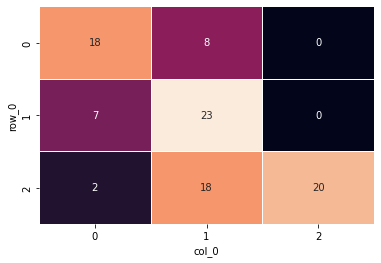

In [5]:
#KNN => 30
model = KNeighborsClassifier(n_neighbors=30, n_jobs=-1, metric='minkowski')
model.fit(trainX, trainY)
y_pred= model.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

accuracy = cross_val_score(model, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(model, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(model, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(model, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(model, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))

Ortalama Accuracy: 0.48842
Ortalama f1_Score: 0.49766
Ortalama recall: 0.48842
Ortalama precision: 0.53557
Ortalama roc_auc: 0.74681


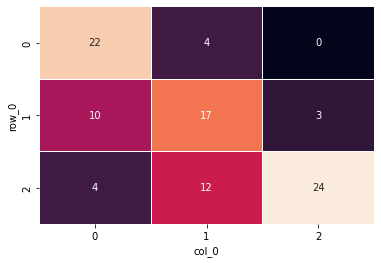

In [6]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(trainX, trainY)
y_pred = GNB.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

accuracy = cross_val_score(GNB, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(GNB, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(GNB, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(GNB, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(GNB, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))

Ortalama Accuracy: 0.62474
Ortalama f1_Score: 0.63846
Ortalama recall: 0.68789
Ortalama precision: 0.68931
Ortalama roc_auc: 0.79930


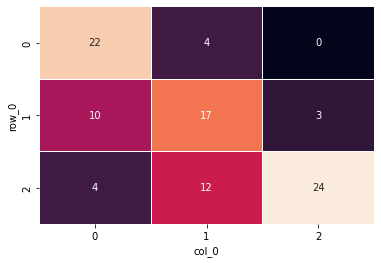

In [7]:
#RandomForest  => 5
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=5) #kaçtane ağaç kullandığı

RF.fit(trainX,trainY)
y_pred = GNB.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

accuracy = cross_val_score(RF, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(RF, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(RF, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(RF, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(RF, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))

Ortalama Accuracy: 0.68789
Ortalama f1_Score: 0.71627
Ortalama recall: 0.73947
Ortalama precision: 0.71867
Ortalama roc_auc: 0.87224


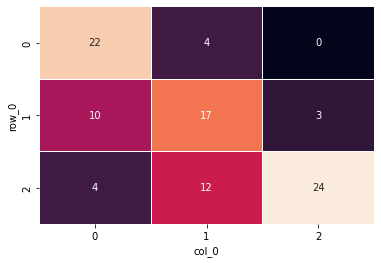

In [8]:
#RandomForest  => 25
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=25) #kaçtane ağaç kullandığı

RF.fit(trainX,trainY)
y_pred = GNB.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

accuracy = cross_val_score(RF, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(RF, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(RF, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(RF, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(RF, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))

Ortalama Accuracy: 0.69789
Ortalama f1_Score: 0.68977
Ortalama recall: 0.73947
Ortalama precision: 0.72499
Ortalama roc_auc: 0.87638


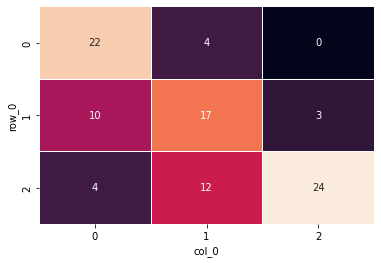

In [9]:
#RandomForest  => 50
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50) #kaçtane ağaç kullandığı

RF.fit(trainX,trainY)
y_pred = GNB.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

accuracy = cross_val_score(RF, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(RF, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(RF, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(RF, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(RF, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))

Ortalama Accuracy: 0.69789
Ortalama f1_Score: 0.64527
Ortalama recall: 0.69789
Ortalama precision: 0.75696
Ortalama roc_auc: 0.87994


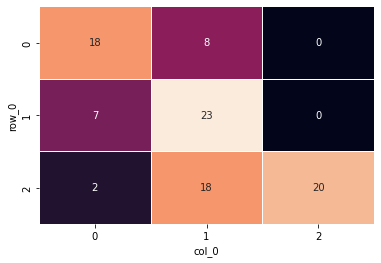

In [10]:
#Destek Vektör Makinesi
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state = 0,probability=True)
classifier.fit(trainX, trainY)
y_pred= model.predict(testX)

cm=confusion_matrix(testY,y_pred)
cm=pd.crosstab(testY,y_pred)
sn.heatmap(cm, linewidths=1, annot=True,fmt='g',cbar=False)

accuracy = cross_val_score(RF, testX, testY, scoring='accuracy',cv=cv)
f1_micro = cross_val_score(RF, testX, testY, scoring='f1_weighted', cv=cv)
recall = cross_val_score(RF, testX, testY, scoring='recall_weighted', cv=cv)
precision = cross_val_score(RF, testX, testY, scoring='precision_weighted', cv=cv)
roc_auc = cross_val_score(RF, testX, testY, scoring='roc_auc_ovo_weighted',cv=cv)

print('Ortalama Accuracy: %.5f' % (mean(accuracy)))
print('Ortalama f1_Score: %.5f' % (mean(f1_micro)))
print('Ortalama recall: %.5f' % (mean(recall)))
print('Ortalama precision: %.5f' % (mean(precision)))
print('Ortalama roc_auc: %.5f' % (mean(roc_auc)))